In [62]:
import numpy as np
import pandas as pd 
from frites import set_mpl_style #If you don't have comment this line
import scipy.stats as stats
import matplotlib.pyplot as plt

In [63]:
set_mpl_style()#comment this one if you don't have the frites package

In [64]:
class BetaModel():
    def __init__(self,v_target,leak_factor=1):             
                
        self.a = 1  # the number of times this action returned a win       
        self.b = 1  # the number of times this action returned a loss
        self.n=0 # number of trials 
        self.omega=leak_factor
        self.vt=v_target #is the absolute value of the target velocity
        # pass the true probablity of the outcome|action taken              
    
    def targetDirection(self,q):        
        """
        q: probability of the target going right
        return: 1 if the target went right or -1 if the target went left
        """
        return stats.bernoulli.rvs(q) 
    
    def eyeDirection(self):
        """
        return: 1 if the eye went right or -1 if the target went left
        """
        return 2*stats.bernoulli.rvs(self.a/(self.a+self.b)) - 1
    
    def outcome(self,td,ed):
        #return the boolean if 1 means that the eye and target have the same direction otherwwise the eye anticpates in
        #the wrong direction
        return int(td==ed)
                    
    def update(self,reward):
        """ 
        reward here is the direction of the eye: 1 if it is the same as the target's direction otherwise 0
        
        """
        self.n += 1    
        
        if reward==1:
            self.a += 1
        
        else:
            self.b += 1
        
        self.a*=self.omega
        self.b*=self.omega
        
    def reset(self):
        self.n=0
        self.a=1
        self.b=1

    def sample(self):
         #return a value sampled from the beta distribution 
        return np.random.beta(self.a,self.b)
        #return np.mean(np.random.beta(self.a,self.b,10))

    def velocity(self):
        p=self.a/(self.a+self.b)
        #Linear Hypothesis
        return 0.2*self.vt*(2*p-1)
        
        
   

In [65]:
stats.bernoulli.rvs(0.5)

0

In [66]:
v_target=15
agent=BetaModel(v_target)
k=0.5
mu=[]
V=[]
O=[]
VVV=[]
OOO=[]
MU=[]
#Probability of the target going right 
P=[0.25,.5,0.75]

P=[0.5,0.7,.9,1]

V_THEOS=[]
for p in P:
    for i in range(150):
        #ed=agent.eyeDirection()
        #td=agent.targetDirection(p)
        #o=agent.outcome(td,ed)
        o=agent.targetDirection(p)
        O.append(o)
        V.append(agent.velocity())
        agent.update(o)
        mu.append(agent.a/(agent.a+agent.b))
    VVV.append(V)
    OOO.append(O)
    MU.append(mu)
    
    print("The estimated probability of the target going right estimated by the agent is:",agent.a/(agent.a+agent.b))
    print("The antipatory velocity of the agent is ", V[-1])
    v_theo=0.2*v_target*(2*p-1)
    V_THEOS.append(v_theo)
    print("The optimal anticpatory theorical velocitiy is " ,v_theo,'\n')
    mu=[]
    V=[]
    O=[]
    agent.reset()
    

The estimated probability of the target going right estimated by the agent is: 0.5394736842105263
The antipatory velocity of the agent is  0.21854304635761568
The optimal anticpatory theorical velocitiy is  0.0 

The estimated probability of the target going right estimated by the agent is: 0.743421052631579
The antipatory velocity of the agent is  1.4900662251655632
The optimal anticpatory theorical velocitiy is  1.1999999999999997 

The estimated probability of the target going right estimated by the agent is: 0.881578947368421
The antipatory velocity of the agent is  2.2847682119205297
The optimal anticpatory theorical velocitiy is  2.4000000000000004 

The estimated probability of the target going right estimated by the agent is: 0.993421052631579
The antipatory velocity of the agent is  2.9602649006622515
The optimal anticpatory theorical velocitiy is  3.0 



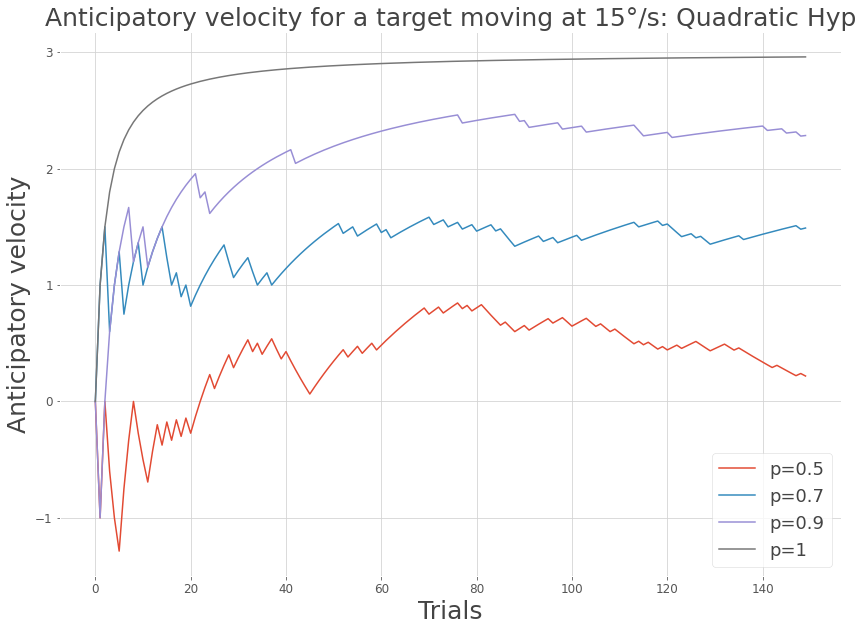

In [76]:
for v,p in zip(VVV,P):
    plt.plot(v,label=f'p={p}')
plt.xlabel("Trials",fontsize=25)
plt.ylabel("Anticipatory velocity",fontsize=25)
plt.title("Anticipatory velocity for a target moving at 15°/s: Quadratic Hyp",fontsize=25)
plt.legend()
plt.savefig('av_lin')

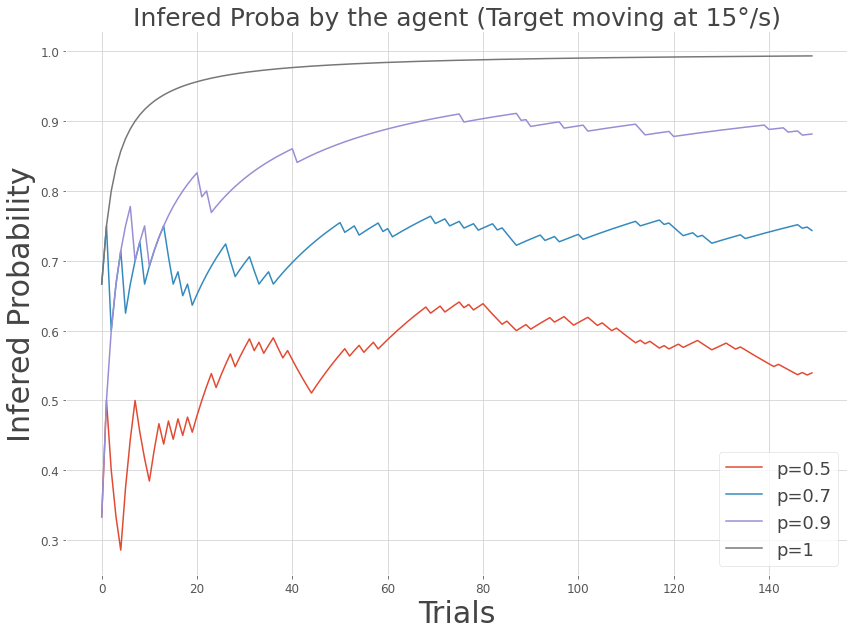

In [68]:
for m,p in zip(MU,P):
    plt.plot(m,label=f'p={p}')
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Infered Probability",fontsize=30)
plt.title("Infered Proba by the agent (Target moving at 15°/s)",fontsize=25)
plt.legend()
plt.savefig("ip_lin")

In [69]:
ERRS=[]
for O,V in zip(OOO,VVV):
    Err=np.array(O)*(1-np.array(V)/v_target)**2 + (1-np.array(O))*(1+np.array(V)/v_target)**2
    ERRS.append(Err)

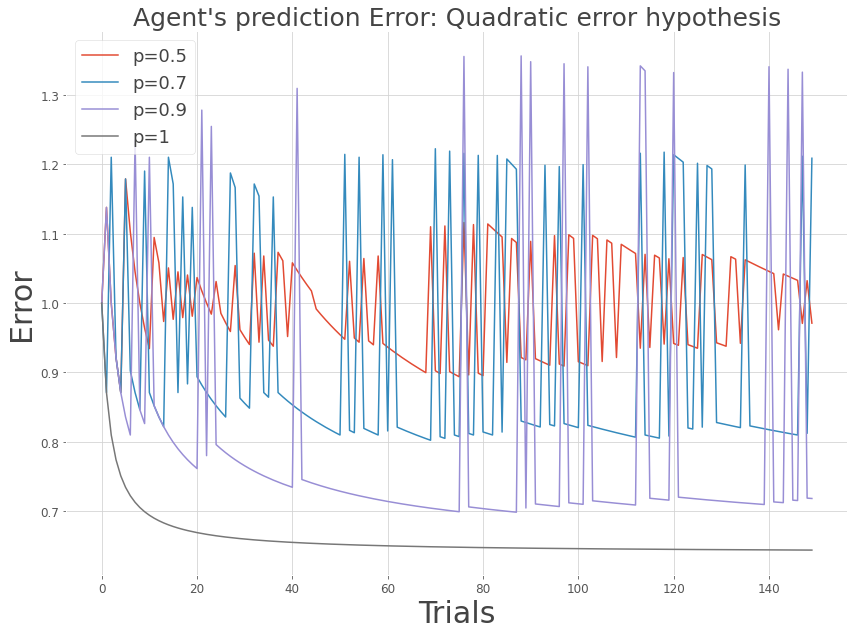

In [77]:
for e,p in zip(ERRS,P):
    plt.plot(e,label=f'p={p}')

plt.xlabel("Trials",fontsize=30)
plt.ylabel("Error",fontsize=30)
plt.title("Agent's prediction Error: Quadratic error hypothesis",fontsize=25)
plt.legend()
plt.savefig("err_lin")

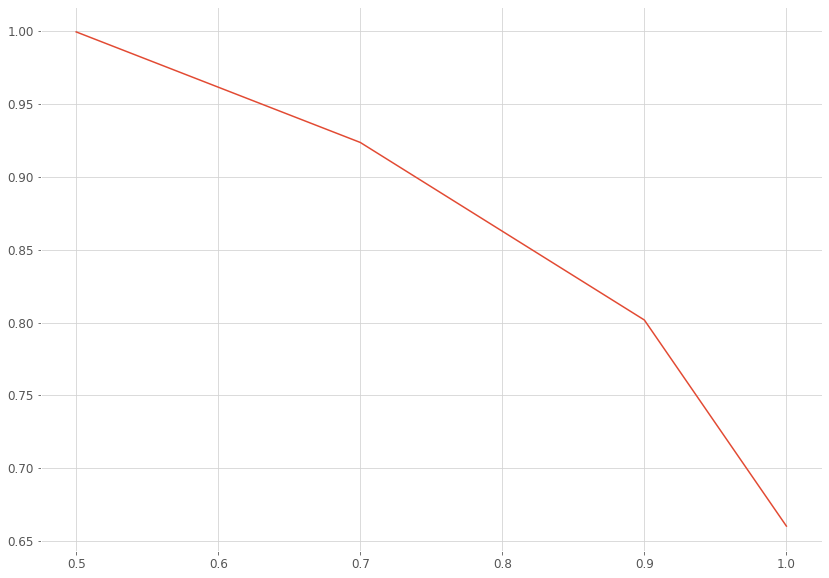

In [71]:
plt.plot(P,np.mean(ERRS,axis=1))

In [27]:
for e,v_th,p in zip(ERRS,V_THEOS,P):
    theo_Err=p*(1-v_th/v_target)**2 + (1-p)*(1+v_th/v_target)**2
    print("Empirical error of the agent is ", np.mean(e))
    print("Theoritical error of the agent is ",theo_Err,'\n')

Empirical error of the agent is  1.0153567382437931
Theoritical error of the agent is  1.0 

Empirical error of the agent is  0.87839278196419
Theoritical error of the agent is  0.8400000000000001 

Empirical error of the agent is  0.4289021093736982
Theoritical error of the agent is  0.35999999999999993 

Empirical error of the agent is  0.017022224819921154
Theoritical error of the agent is  0.0 



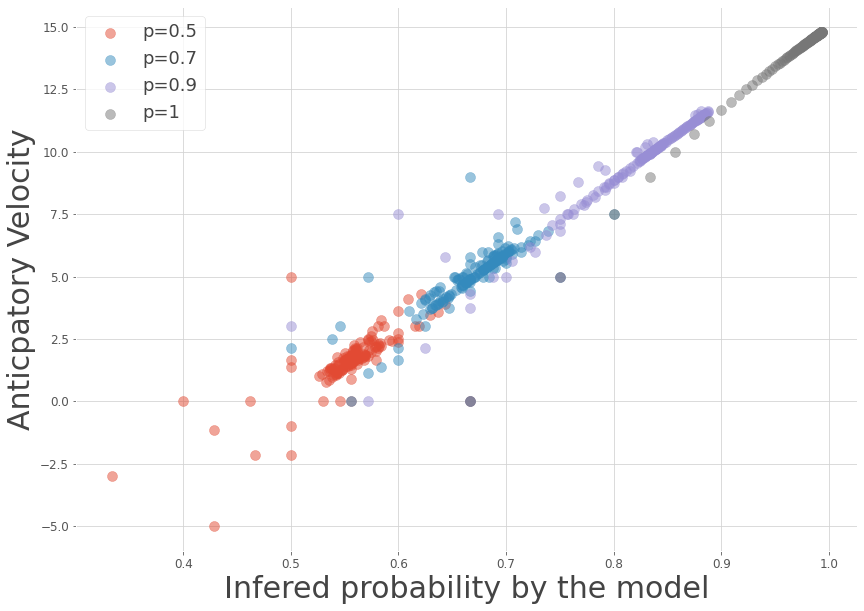

In [28]:
for m,v,p in zip(MU,VVV,P):
    plt.scatter(m,v,s=100,label=f'p={p}',alpha=0.5)
plt.xlabel("Infered probability by the model",fontsize=30)
plt.ylabel("Anticpatory Velocity",fontsize=30)
plt.legend()

Text(0.5, 1.0, 'Theoretical Plot of the Relationship: Proba & Velocity')

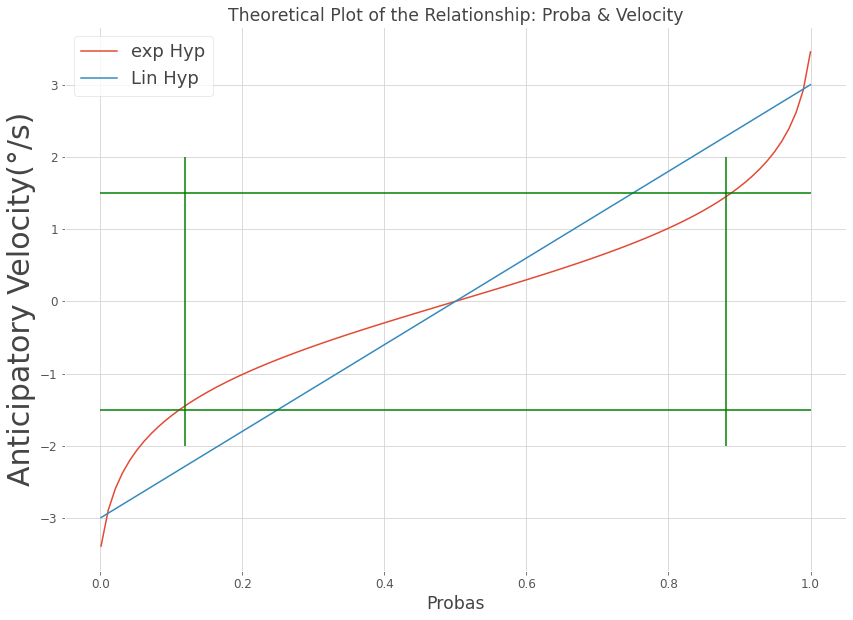

In [29]:
#Theorical plot
#Exponentiel Plot
P=np.linspace(0.001,0.9999,100,endpoint=True)
VV=0.1*v_target*1/2*np.log((P+0.01)/(1-P+0.01))
plt.plot(P,VV,label="exp Hyp")
#Linear Plot
VV=0.2*v_target*(2*P-1)
plt.plot(P,VV,label="Lin Hyp")
plt.hlines(-v_target*0.1,0.0,1,colors="green")
plt.hlines(v_target*0.1,0.0,1,colors="green")
plt.vlines(1/(np.exp(2)+1),-2,2,colors="green")
plt.vlines(1/(np.exp(-2)+1),-2,2,colors="green")
plt.xlabel("Probas")
plt.ylabel("Anticipatory Velocity(°/s)",fontsize=30)
plt.legend()
plt.title("Theoretical Plot of the Relationship: Proba & Velocity")


In [30]:
1/(np.exp(2)+1)

0.11920292202211755

In [31]:
1/(np.exp(-2)+1)

0.8807970779778823

In [32]:
v_target=10
agent=BetaModel(v_target)
policy=BetaModel(v_target)
k=0.5
mu=[]
V=[]
O=[]
VVV=[]
OOO=[]
MU=[]
#Probability of the target going right 
P=[0.25,.5,0.75]
P=[0.7,.9,1]

V_THEOS=[]
for p in P:
    for i in range(200):
        o=agent.outcome(p)
        O.append(o)
        V.append(agent.velocity())
        agent.update(o)
        mu.append(agent.a/(agent.a+agent.b))
    VVV.append(V)
    OOO.append(O)
    MU.append(mu)
    
    print("The estimated probability of the target going right estimated by the agent is:",agent.a/(agent.a+agent.b))
    print("The antipatory velocity of the agent is ", V[-1])
    v_theo=k*v_target*(2*p-1)
    V_THEOS.append(v_theo)
    print("The optimal anticpatory theorical velocitiy is " ,v_theo,'\n')
    mu=[]
    V=[]
    O=[]
    agent.reset()
    

TypeError: outcome() missing 1 required positional argument: 'ed'

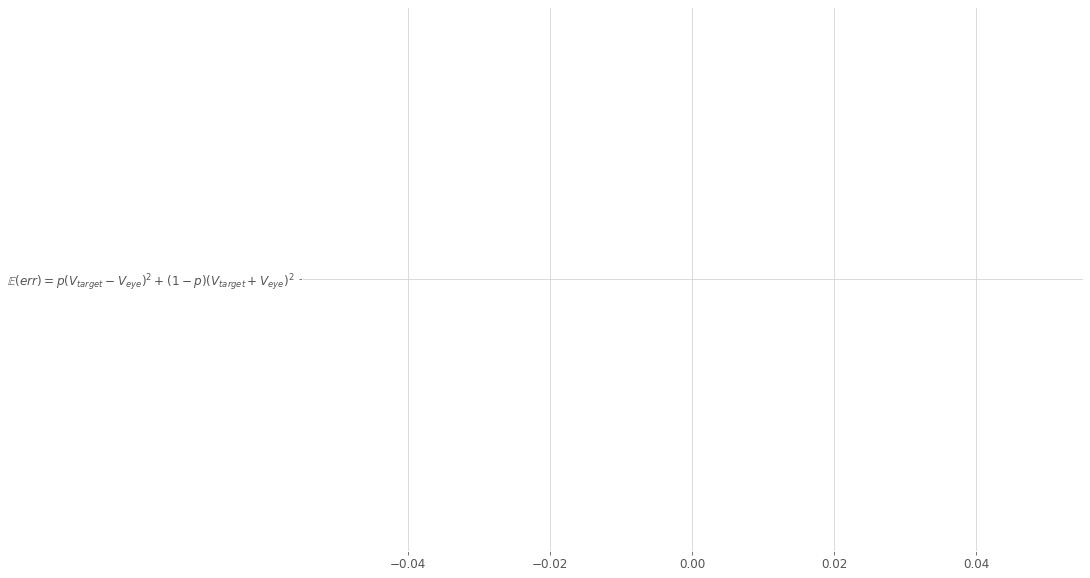

In [61]:
plt.plot('$\mathbb{E}(err)=p(V_{target}-V_{eye})^2 + (1-p) (V_{target}+V_{eye})^2$')